<a href="https://colab.research.google.com/github/enino84/Intro-to-Data-Analytics/blob/main/IS_Folium_Maps_OpenStreetMaps_Contourf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos Abiertos:**

https://www.datos.gov.co/Transporte/accidentes-calle-30-2015-2019/sefb-a755

In [ ]:
import pandas as pd

In [ ]:
url = 'https://www.datos.gov.co/api/views/yb9r-2dsi/rows.csv?accessType=DOWNLOAD';
df_acc = pd.read_csv(url);

In [ ]:
df_acc.head(4)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,01/01/2015 12:00:00 AM,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1
1,01/01/2015 12:00:00 AM,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1
2,01/01/2015 12:00:00 AM,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1
3,01/01/2015 12:00:00 AM,2015,1,Jue,03:30:00:PM,Con heridos,Choque,CL 45 CR 19,2.0,NaN,1


# `datetime`

Convertimos los datos de la columna `df_acc['FECHA_ACCIDENTE']` a campos `datetime`.

In [ ]:
df_acc['FECHA_ACCIDENTE'] = pd.to_datetime(df_acc['FECHA_ACCIDENTE']);

In [ ]:
df_acc.tail(2)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
37242,2021-09-30,2021,9,Jue,09:30:00:AM,Solo daños,Choque,CR 25B 74B 94,NaN,NaN,1
37243,2021-09-30,2021,9,Jue,12:10:00:PM,Solo daños,Choque,CR 43 CL 55,NaN,NaN,1


# Setting the format: https://www.w3schools.com/python/python_datetime.asp

In [ ]:
df_acc['FECHA_ACCIDENTE'].dt.second

0        0
1        0
2        0
3        0
4        0
        ..
37239    0
37240    0
37241    0
37242    0
37243    0
Name: FECHA_ACCIDENTE, Length: 37244, dtype: int64

In [ ]:
df_acc['HORA_ACCIDENTE'] = pd.to_datetime(df_acc['HORA_ACCIDENTE'], format='%I:%M:%S:%p');

In [ ]:
df_acc.head(3)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,2015-01-01,2015,1,Jue,1900-01-01 14:10:00,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1
1,2015-01-01,2015,1,Jue,1900-01-01 14:15:00,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1
2,2015-01-01,2015,1,Jue,1900-01-01 14:20:00,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1


# `timedelta`

In [ ]:
fecha = df_acc['FECHA_ACCIDENTE'];
hora = df_acc['HORA_ACCIDENTE'];

In [ ]:
fecha_total = fecha + pd.to_timedelta(hora.dt.hour, unit='hr') + pd.to_timedelta(hora.dt.minute, unit='min')

In [ ]:
fecha_total

0       2015-01-01 14:10:00
1       2015-01-01 14:15:00
2       2015-01-01 14:20:00
3       2015-01-01 15:30:00
4       2015-01-01 04:20:00
                ...        
37239   2021-09-30 18:20:00
37240   2021-09-30 08:10:00
37241   2021-09-30 20:15:00
37242   2021-09-30 09:30:00
37243   2021-09-30 12:10:00
Length: 37244, dtype: datetime64[ns]

# Agregamos una nueva columna a nuestro dataframe `df_acc`

In [ ]:
df_acc['fecha'] = fecha_total;

In [ ]:
df_acc.head(3)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,fecha
0,2015-01-01,2015,1,Jue,1900-01-01 14:10:00,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1,2015-01-01 14:10:00
1,2015-01-01,2015,1,Jue,1900-01-01 14:15:00,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1,2015-01-01 14:15:00
2,2015-01-01,2015,1,Jue,1900-01-01 14:20:00,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1,2015-01-01 14:20:00


# drop column from a dataframe

Pregunta de David

In [ ]:
df_acc_copy = df_acc.drop(columns=['FECHA_ACCIDENTE','AÑO_ACCIDENTE','MES_ACCIDENTE','DIA_ACCIDENTE','HORA_ACCIDENTE'])

In [ ]:
df_acc_copy.head(3)

,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,fecha
0,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1,2015-01-01 14:10:00
1,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1,2015-01-01 14:15:00
2,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1,2015-01-01 14:20:00


In [ ]:
df_acc.head(3)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,fecha
0,2015-01-01,2015,1,Jue,1900-01-01 14:10:00,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1,2015-01-01 14:10:00
1,2015-01-01,2015,1,Jue,1900-01-01 14:15:00,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1,2015-01-01 14:15:00
2,2015-01-01,2015,1,Jue,1900-01-01 14:20:00,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1,2015-01-01 14:20:00


In [ ]:
df_acc.tail(3)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,fecha
37241,2021-09-30,2021,9,Jue,1900-01-01 20:15:00,Con heridos,Choque,CR 20 24 114,1.0,NaN,1,2021-09-30 20:15:00
37242,2021-09-30,2021,9,Jue,1900-01-01 09:30:00,Solo daños,Choque,CR 25B 74B 94,NaN,NaN,1,2021-09-30 09:30:00
37243,2021-09-30,2021,9,Jue,1900-01-01 12:10:00,Solo daños,Choque,CR 43 CL 55,NaN,NaN,1,2021-09-30 12:10:00


## Manera correcta empleando `inplace=True`

In [ ]:
df_acc.drop(columns=['FECHA_ACCIDENTE','AÑO_ACCIDENTE','MES_ACCIDENTE','DIA_ACCIDENTE','HORA_ACCIDENTE'], inplace=True)

In [ ]:
df_acc.head(3)

,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,fecha
0,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1,2015-01-01 14:10:00
1,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1,2015-01-01 14:15:00
2,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1,2015-01-01 14:20:00


In [ ]:
df_acc.columns = ['gravedad','clase','sitio','heridos','muertes','cantidad','fecha'];

In [ ]:
df_acc.head(3)

,gravedad,clase,sitio,heridos,muertes,cantidad,fecha
0,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1,2015-01-01 14:10:00
1,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1,2015-01-01 14:15:00
2,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1,2015-01-01 14:20:00


In [ ]:
df_acc.columns

Index(['gravedad', 'clase', 'sitio', 'heridos', 'muertes', 'cantidad',
       'fecha'],
      dtype='object')

In [ ]:
df_acc.index

RangeIndex(start=0, stop=37244, step=1)

In [ ]:
df_acc['gravedad'].unique()

array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

# Funciones de Agregación

1. Son empleadas para agregar datos (condensar datos)
2. max, min, mean, sum, count

# **Conjunto de datos**

Q = [(A,1), (A,2), (B,1), (B,5), (C,100)] 

Agregar la información por (LETRA, NUMBER)

1. Agregación por LETRA
* [(A,1), (A,2)]
* [(B,1), (B,5)]
* [(C,100)]

2.1. La función de agregación max
[A->2], [B->5], [C->100]

2.2. La función de agregación min
[A->1], [B->1], [C->100]

2.3. La función de agregación sum
[A->3], [B->6], [C->100]

2.4. La función de agregación count
[A->2], [B->2], [C->1]

2.5. La función de agregación mean
[A->1.5], [B->3], [C->100]

# 2021-07-30 11:30:00

In [ ]:
select = ['gravedad','cantidad'];
grupos = ['gravedad'];
df_acc_gravedad = df_acc[select].groupby(by=grupos).count()

In [ ]:
df_acc_gravedad.reset_index(inplace=True)

In [ ]:
df_acc_gravedad

,gravedad,cantidad
0,Con heridos,7653
1,Con muertos,240
2,Solo daños,29351


In [ ]:
df_acc_gravedad.columns

Index(['gravedad', 'cantidad'], dtype='object')

In [ ]:
df_acc_gravedad.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
import seaborn as sns

# `barplot`

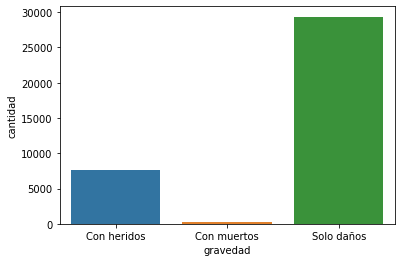

In [ ]:
sns.barplot(data=df_acc_gravedad, x='gravedad', y='cantidad');

# Por clase de accidente

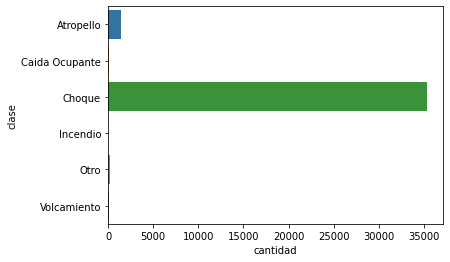

In [ ]:
select = ['clase','cantidad'];
grupos = ['clase'];
df_acc_clase = df_acc[select].groupby(by=grupos).count()
df_acc_clase.reset_index(inplace=True);
sns.barplot(data=df_acc_clase, y='clase', x='cantidad');

# **Dos niveles de Agregación**

In [ ]:
select = ['gravedad','clase','cantidad'];
grupos = ['gravedad','clase'];
df_acc_gravedad_clase = df_acc[select].groupby(by=grupos).count()
#df_acc_gravedad_clase.reset_index(inplace=True);


In [ ]:
df_acc_gravedad_clase

cantidad
gravedad    clase                   
Con heridos Atropello           1296
            Caida Ocupante       152
            Choque              6060
            Incendio               1
            Otro                  88
            Volcamiento           56
Con muertos Atropello             86
            Caida Ocupante         4
            Choque               142
            Otro                   6
            Volcamiento            2
Solo daños  Choque             29135
            Incendio              19
            Otro                 127
            Volcamiento           70

In [ ]:
df_acc_gravedad_clase.columns

Index(['cantidad'], dtype='object')

In [ ]:
df_acc_gravedad_clase.index

MultiIndex([('Con heridos',      'Atropello'),
            ('Con heridos', 'Caida Ocupante'),
            ('Con heridos',         'Choque'),
            ('Con heridos',       'Incendio'),
            ('Con heridos',           'Otro'),
            ('Con heridos',    'Volcamiento'),
            ('Con muertos',      'Atropello'),
            ('Con muertos', 'Caida Ocupante'),
            ('Con muertos',         'Choque'),
            ('Con muertos',           'Otro'),
            ('Con muertos',    'Volcamiento'),
            ( 'Solo daños',         'Choque'),
            ( 'Solo daños',       'Incendio'),
            ( 'Solo daños',           'Otro'),
            ( 'Solo daños',    'Volcamiento')],
           names=['gravedad', 'clase'])

In [ ]:
df_acc_gravedad_clase.reset_index(inplace=True)

In [ ]:
df_acc_gravedad_clase

,gravedad,clase,cantidad
0,Con heridos,Atropello,1296
1,Con heridos,Caida Ocupante,152
2,Con heridos,Choque,6060
3,Con heridos,Incendio,1
4,Con heridos,Otro,88
5,Con heridos,Volcamiento,56
6,Con muertos,Atropello,86
7,Con muertos,Caida Ocupante,4
8,Con muertos,Choque,142
9,Con muertos,Otro,6


# Ideas

# 1. `barplot` hue

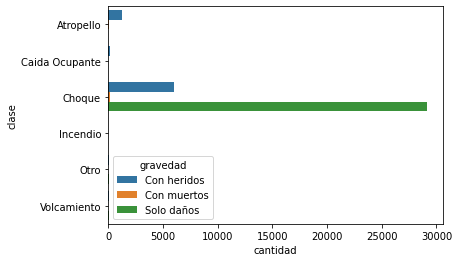

In [ ]:
sns.barplot(data=df_acc_gravedad_clase,x='cantidad',y='clase',hue='gravedad')

# 2. `catplot`

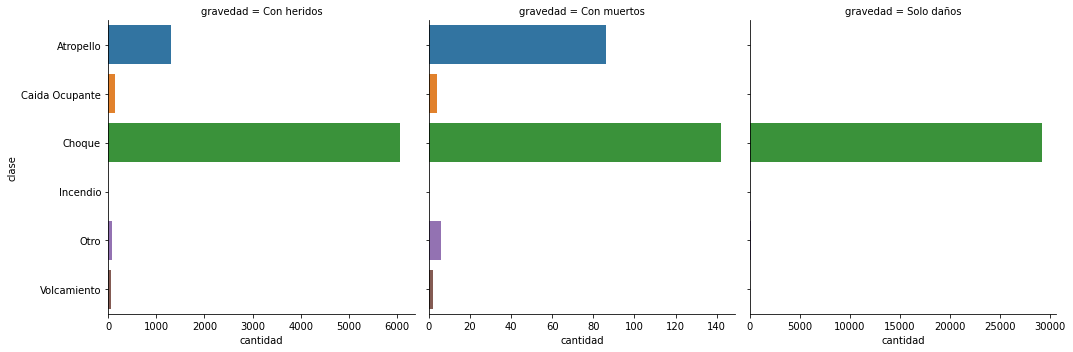

In [ ]:
sns.catplot(data=df_acc_gravedad_clase, x='cantidad', y='clase', col='gravedad', kind='bar', sharex=False)

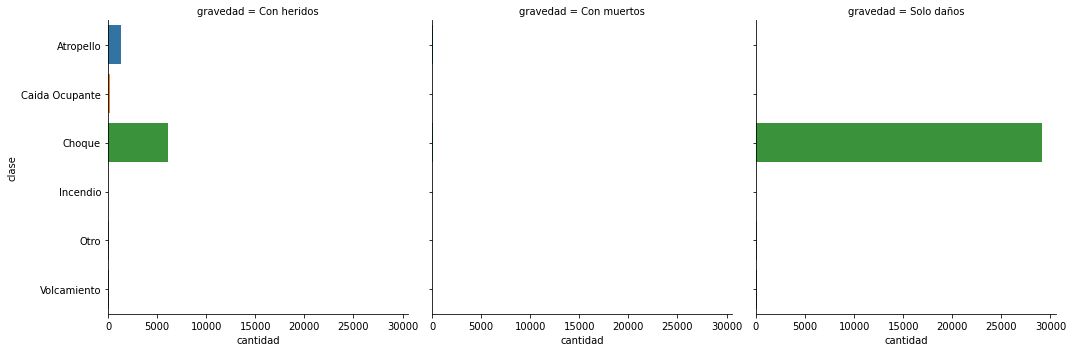

In [ ]:
sns.catplot(data=df_acc_gravedad_clase, x='cantidad', y='clase', col='gravedad', kind='bar')

# `sharex`

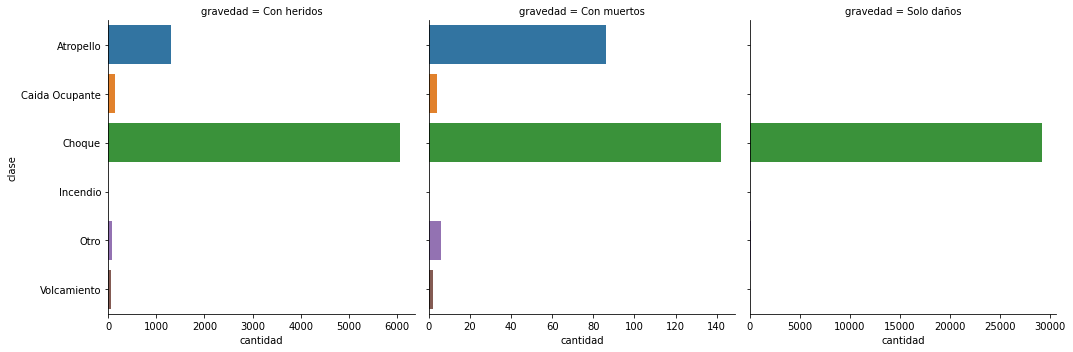

In [ ]:
sns.catplot(data=df_acc_gravedad_clase, x='cantidad', y='clase', col='gravedad', kind='bar', sharex=False)

In [ ]:
df_acc.head(2)

,gravedad,clase,sitio,heridos,muertes,cantidad,fecha
0,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1,2015-01-01 14:10:00
1,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1,2015-01-01 14:15:00


# `fillna`

# **NaN** - **N**ot **A** **N**umber

Campos Nulos - Sin información - (NULL, null, None)

In [ ]:
df_acc.isna().any()

gravedad    False
clase       False
sitio        True
heridos      True
muertes      True
cantidad    False
fecha       False
dtype: bool

In [ ]:
reemplazar_nans = {'sitio':'NO REPORTA', 'heridos':0, 'muertes':0};

df_acc.fillna(reemplazar_nans, inplace=True)

astype()

1. 'int32' - Integers - IEE-754
2. 'float32' ('float64' - double) - Floats (reales) - IEE-754

In [ ]:
df_acc['heridos'] = df_acc['heridos'].astype('int32');
df_acc['muertes'] = df_acc['muertes'].astype('int32');

In [ ]:
df_acc.head(6)

,gravedad,clase,sitio,heridos,muertes,cantidad,fecha
0,Con heridos,Choque,VIA 40 CON 77,1,0,1,2015-01-01 14:10:00
1,Solo daños,Choque,CALLE 14 CR 13,0,0,1,2015-01-01 14:15:00
2,Solo daños,Choque,CL 74 CR 38C,0,0,1,2015-01-01 14:20:00
3,Con heridos,Choque,CL 45 CR 19,2,0,1,2015-01-01 15:30:00
4,Solo daños,Choque,CRA 15 CLLE 21,0,0,1,2015-01-01 04:20:00
5,Con heridos,Choque,CRA 14 CLLE 35,2,0,1,2015-01-01 16:40:00


# **Standard - Address (sitio)**

In [ ]:
df_acc['sitio'].unique()

array(['VIA 40 CON 77', 'CALLE 14 CR 13', 'CL 74 CR 38C', ...,
       'CARRERA 56 FRENTE # 68 157', 'CR 20 24 114', 'CR 25B 74B 94'],
      dtype=object)

## https://www.w3schools.com/python/python_strings_methods.asp

In [ ]:
direcciones = df_acc['sitio'].str.split(' ', expand=True)

In [ ]:
direcciones.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,VIA,40,CON,77,None,None,None,None,None,None,None,None,None
1,CALLE,14,CR,13,None,None,None,None,None,None,None,None,None
2,CL,74,CR,38C,None,None,None,None,None,None,None,None,None
3,CL,45,CR,19,None,None,None,None,None,None,None,None,None


In [ ]:
direcciones.fillna(value=' ', inplace=True)

In [ ]:
direcciones.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,VIA,40,CON,77,,,,,,,,,
1,CALLE,14,CR,13,,,,,,,,,
2,CL,74,CR,38C,,,,,,,,,
3,CL,45,CR,19,,,,,,,,,
4,CRA,15,CLLE,21,,,,,,,,,
5,CRA,14,CLLE,35,,,,,,,,,


In [ ]:
typos_calle = ['CL', 'CLLE', 'cCLLE', 'CLL', 'CELL', 'CLEL', 'cl', 'clle', 'CLK', 
               'calle', 'CLE', 'CALE', 'cll', 'CALLEC', 'ALLE', 'CALL', 'CZALLE',
               'CLLA'];

In [ ]:
typos_carrera = ['CRA', 'CRE', 'CREA','cra','cr', 'carrera',
                 'CRR', 'CRARRERA', 'KRA', 'CRC', 'CARRERAB', 'CARRERAN', 'CARRERS',
                 'Cra', 'K', 'CR'];

# List Comprehension

[lo que quiero hacer con **var** for **var** in *el conjunto de variables*]

In [ ]:
reemplazar_calle   = {typo:'CALLE'   for typo in typos_calle  };
reemplazar_carrera = {typo:'CARRERA' for typo in typos_carrera};
reemplazar = reemplazar_calle;
reemplazar.update(reemplazar_carrera);

In [ ]:
for columna in direcciones.columns:
  direcciones[columna] = direcciones[columna].replace(reemplazar);

In [ ]:
direcciones.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,VIA,40,CON,77,,,,,,,,,
1,CALLE,14,CARRERA,13,,,,,,,,,
2,CALLE,74,CARRERA,38C,,,,,,,,,


In [ ]:
direcciones.iloc[0]

0     VIA
1      40
2     CON
3      77
4        
5        
6        
7        
8        
9        
10       
11       
12       
Name: 0, dtype: object

In [ ]:
direcciones.iloc[1][0]+' '+direcciones.iloc[1][1]

'CALLE 14'

In [ ]:
' '.join(direcciones.iloc[1].values).rstrip()

'CALLE 14 CARRERA 13'

In [ ]:
dir_ready = [];
for registro in direcciones.index:
  #dir_ready.append(' '.join(direcciones.iloc[registro].values).rstrip())
  dir_ready.append(direcciones.iloc[registro][0]+' '+direcciones.iloc[registro][1])

In [ ]:
df_acc['sitio'] = dir_ready

In [ ]:
df_acc

,gravedad,clase,sitio,heridos,muertes,cantidad,fecha
0,Con heridos,Choque,VIA 40,1,0,1,2015-01-01 14:10:00
1,Solo daños,Choque,CALLE 14,0,0,1,2015-01-01 14:15:00
2,Solo daños,Choque,CALLE 74,0,0,1,2015-01-01 14:20:00
3,Con heridos,Choque,CALLE 45,2,0,1,2015-01-01 15:30:00
4,Solo daños,Choque,CARRERA 15,0,0,1,2015-01-01 04:20:00
...,...,...,...,...,...,...,...
37239,Con heridos,Atropello,CARRERA 15,2,0,1,2021-09-30 18:20:00
37240,Con heridos,Choque,CARRERA 56,1,0,1,2021-09-30 08:10:00
37241,Con heridos,Choque,CARRERA 20,1,0,1,2021-09-30 20:15:00
37242,Solo daños,Choque,CARRERA 25B,0,0,1,2021-09-30 09:30:00


# Sitios Top - Accidentes

In [ ]:
select = ['sitio', 'cantidad'];
grupos = ['sitio'];
df_acc_sitio = df_acc[select].groupby(by=grupos).count(); #max()
df_acc_sitio.reset_index(inplace=True);

In [ ]:
df_acc_sitio.nlargest(n=15, columns=['cantidad'])

,sitio,cantidad
970,VIA 40,1715
170,CALLE 30,1635
106,CALLE 110,1507
550,CARRERA 38,1466
209,CALLE 45,1264
23,AV CIRCUNVALAR,1073
594,CARRERA 43,895
611,CARRERA 46,873
316,CALLE 72,660
601,CARRERA 44,645


In [ ]:
df_acc_top = df_acc_sitio.nlargest(n=15, columns=['cantidad'])

In [ ]:
df_acc_top

,sitio,cantidad
970,VIA 40,1715
170,CALLE 30,1635
106,CALLE 110,1507
550,CARRERA 38,1466
209,CALLE 45,1264
23,AV CIRCUNVALAR,1073
594,CARRERA 43,895
611,CARRERA 46,873
316,CALLE 72,660
601,CARRERA 44,645


# **Georeferencia - lon, lat, elev**

1. (lon, lat) = (x, y)

2. Taken from: https://keydifferences.com/difference-between-latitude-and-longitude.html

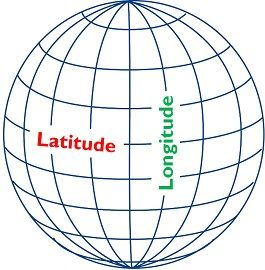



# **GeoPy**

https://geopy.readthedocs.io/en/stable/

https://www.openstreetmap.org/#map=6/4.632/-74.299

https://nominatim.org/

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(); #OpenStreetMap by default

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
df_acc_top.iloc[0]['sitio']

'VIA 40'

In [ ]:
direccion = df_acc_top.iloc[0]['sitio'];
place = geolocator.geocode(direccion+', Barranquilla, Colombia')

In [ ]:
print(place)

Vía 40, Siape, Las Flores, Barranquilla, Atlántico, 080001, Colombia


In [ ]:
place.latitude

11.0320547

In [ ]:
place.longitude

-74.8095839

# **Folium**

https://python-visualization.github.io/folium/

In [ ]:
import folium as fl

In [ ]:
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
m

# **Marker**

In [ ]:
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
fl.Marker(location=[place.latitude, place.longitude]).add_to(m)
m

In [ ]:
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
fl.Marker(location=[place.latitude, place.longitude], popup=place.address).add_to(m)
m

In [ ]:
df_acc_top

,sitio,cantidad
970,VIA 40,1715
170,CALLE 30,1635
106,CALLE 110,1507
550,CARRERA 38,1466
209,CALLE 45,1264
23,AV CIRCUNVALAR,1073
594,CARRERA 43,895
611,CARRERA 46,873
316,CALLE 72,660
601,CARRERA 44,645


In [ ]:
df_acc_top.loc[334]

sitio       CALLE 76
cantidad         497
Name: 334, dtype: object

Christian - Q

In [ ]:
df_acc_1 = df_acc_top.copy()

In [ ]:
df_acc_1.reset_index(inplace=True)

In [ ]:
df_acc_1.drop(columns='index',inplace=True)

In [ ]:
df_acc_1

,sitio,cantidad
0,VIA 40,1715
1,CALLE 30,1635
2,CALLE 110,1507
3,CARRERA 38,1466
4,CALLE 45,1264
5,AV CIRCUNVALAR,1073
6,CARRERA 43,895
7,CARRERA 46,873
8,CALLE 72,660
9,CARRERA 44,645


In [ ]:
geo = [];
for indice in df_acc_top.index:
  direccion = df_acc_top.loc[indice]['sitio'];
  place = geolocator.geocode(direccion+', Barranquilla, Colombia')
  geo.append(place);
  print(place)

Vía 40, Siape, Las Flores, Barranquilla, Atlántico, 080001, Colombia
Carrera 43, Barranquillita, Barranquilla, Atlántico, 080002, Colombia
Calle 110, Las Flores, Barranquilla, Atlántico, 80020, Colombia
Carrera 38, Campo Alegre, Barranquilla, Atlántico, 080020, Colombia
Calle 45, Ciudadela 20 de Julio, Barranquilla, Atlántico, 083001, Colombia
Avenida Circunvalar, Los Olivos II, Barranquilla, Atlántico, 080020, Colombia
Carrera 43, Barranquilla, Atlántico, 080001, Colombia
Carrera 46, Barranquillita, Barranquilla, Atlántico, 080002, Colombia
Calle 72, El Bosque, Barranquilla, Atlántico, 080006, Colombia
Carrera 44, Barranquilla, Atlántico, 080001, Colombia
Calle 19, Simón Bolívar, Barranquilla, Atlántico, 083002, Colombia
Calle 17, Pasadena, Barranquilla, Atlántico, 083002, Colombia
Carrera 53, Barranquilla, Atlántico, 080020, Colombia
Calle 84, Barranquilla, Atlántico, 080001, Colombia
Calle 76, Barranquilla, Atlántico, 080001, Colombia


In [ ]:
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
for lugar in geo:
  fl.Marker(location=[lugar.latitude, lugar.longitude], popup=place.address).add_to(m)
m

# Choropleth - OpenStreetMap + Google Maps

## json - https://es.wikipedia.org/wiki/GeoJSON

In [ ]:
geo = [];
for indice in df_acc_top.index:
  direccion = df_acc_top.loc[indice]['sitio'];
  place = geolocator.geocode(direccion+', Barranquilla, Colombia', geometry='geojson')
  geo.append(place);
  print(place)

Vía 40, Siape, Las Flores, Barranquilla, Atlántico, 080001, Colombia
Carrera 43, Barranquillita, Barranquilla, Atlántico, 080002, Colombia
Calle 110, Las Flores, Barranquilla, Atlántico, 80020, Colombia
Carrera 38, Campo Alegre, Barranquilla, Atlántico, 080020, Colombia
Calle 45, Ciudadela 20 de Julio, Barranquilla, Atlántico, 083001, Colombia
Avenida Circunvalar, Los Olivos II, Barranquilla, Atlántico, 080020, Colombia
Carrera 43, Barranquilla, Atlántico, 080001, Colombia
Carrera 46, Barranquillita, Barranquilla, Atlántico, 080002, Colombia
Calle 72, El Bosque, Barranquilla, Atlántico, 080006, Colombia
Carrera 44, Barranquilla, Atlántico, 080001, Colombia
Calle 19, Simón Bolívar, Barranquilla, Atlántico, 083002, Colombia
Calle 17, Pasadena, Barranquilla, Atlántico, 083002, Colombia
Carrera 53, Barranquilla, Atlántico, 080020, Colombia
Calle 84, Barranquilla, Atlántico, 080001, Colombia
Calle 76, Barranquilla, Atlántico, 080001, Colombia


In [ ]:
geo[0].raw['geojson']

{'coordinates': [[-74.8156779, 11.0363431],
  [-74.815543, 11.0362474],
  [-74.8130934, 11.0345108],
  [-74.8121387, 11.0338473],
  [-74.8116474, 11.0335057],
  [-74.8107957, 11.0329138],
  [-74.8095839, 11.0320547],
  [-74.8085536, 11.031327],
  [-74.8079578, 11.0308717],
  [-74.8075155, 11.0304561],
  [-74.8070814, 11.029997],
  [-74.8065057, 11.0292941],
  [-74.8056614, 11.0283371],
  [-74.8044708, 11.0269876],
  [-74.8038697, 11.0263118]],
 'type': 'LineString'}

In [ ]:
pl = geo[0];
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
fl.Choropleth(geo_data=pl.raw['geojson'], line_weight=12, line_color='red').add_to(m);
m

## Tiles - Folium

https://python-visualization.github.io/folium/modules.html

In [ ]:
pl = geo[0];
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16, tiles='Stamen Toner')
fl.Choropleth(geo_data=pl.raw['geojson'], line_weight=12, line_color='red').add_to(m);
m

In [ ]:
pl = geo[0];
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16, tiles='Stamen Watercolor')
fl.Choropleth(geo_data=pl.raw['geojson'], line_weight=12, line_color='red').add_to(m);
m

In [ ]:
pl = geo[0];
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16, tiles='Stamen Terrain')
fl.Choropleth(geo_data=pl.raw['geojson'], line_weight=12, line_color='red').add_to(m);
m

In [ ]:
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
for lugar in geo:
  fl.Choropleth(geo_data=lugar.raw['geojson'], line_weight=12, line_color='red').add_to(m);
m

In [ ]:
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16, tiles='Stamen Toner')
for lugar in geo:
  fl.Choropleth(geo_data=lugar.raw['geojson'], line_weight=12, line_color='red').add_to(m);
m

# Dash - https://dash.plotly.com/

# Icon

## https://fontawesome.com/v5.15/icons?d=gallery

In [ ]:
pl = geo[0];
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
icono = fl.Icon(color='blue', icon='ambulance', prefix='fa'); #Este es el icono
fl.Marker(location=[place.latitude, place.longitude],icon=icono).add_to(m)
m

In [ ]:
pl = geo[0];
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
icono = fl.Icon(color='blue', icon='car', prefix='fa'); #Este es el icono
fl.Marker(location=[place.latitude, place.longitude],icon=icono).add_to(m)
m

In [ ]:
pl = geo[0];
m = fl.Map(location=[place.latitude, place.longitude], zoom_start=16)
icono = fl.Icon(color='blue', icon='amazon', prefix='fa'); #Este es el icono
fl.Marker(location=[place.latitude, place.longitude],icon=icono).add_to(m)
m